Author: Carlos Roberto de Melo

Date: 05/26/2020

Obj: Cut the original datacube of ESO325-G004 around the central galaxy.
     Cortar o cubo de dados original da ESO325-G004 ao redor da galáxia central.

In [1]:
from mpdaf.obj import Cube
from mpdaf.obj import deg2sexa, sexa2deg
import astropy.units as u
import matplotlib.pyplot as plt

Opening the original data cube.
Abrindo o cubo original de dados.

In [2]:
cube = Cube('/home/carlos/Documents/Dados Projeto/ESO325/MUSE/ADP.2016-09-07T12_23_32.515.fits')

Defining the center around where the cut will be made.

Definindo o centro ao redor de onde será feito o corte.

In [3]:
center_sex = ['-38:10:35.22','13:43:33.350'] #Center position in (DEC,RA)/Posição do centro em (DE,RA)
center_deg = sexa2deg(center_sex)            #Convert (DEC,RA) to degree/Convertendo (DEC,RA) para graus
center_px = [232.004615992295,275.372461991368] #Direct from Header. Format (y,x) in px value/Diretamente do Header do cubo. Formato (y,x), valor em px.
print(center_deg) 

[-38.1764 205.889 ]


### Making a square cut around the center defined above. ###

**center**: Defines the center for the cut.

**unit_center**: Defines the units of the center. In astropy units. If **None**, the unit is pixel.

**size**: Defines the  length square.

**unit_size**: Defines the units of size. In astropy units. If **None**, the unit is pixel.

**lbda**: Defines the wavelength range for extraction.

**unit_wave**: Defines the units of wavelength. In astropy units.

### Realizando o corte quadrado ao redor do centro definido acima.

**center**: Define o centro para para o corte.

**unit_center**: Define as unidades do centro, em unidades Astropy. Se for **None**, a unidade é pixel.

**size**: Define o comprimento do lado do quadrado.

**unit_size**: Define as unidades para o lado, em unidades Astropy. Se **Non**, então a unidade é pixel.

**lbda**: Define o range para extração de comprimento de onda.

**unit_wave**: Define a unidade para o comprimento de onda, em unidades Astropy.

In [4]:
corte = cube.subcube(center=center_px, size=12, lbda=(4780,5500), unit_center=None, unit_size=u.arcsec, unit_wave=u.angstrom)

Display informations about the cut and make a image.

Apresentra informações do corte e cria uma imagem.

[INFO] 577 x 60 x 60 Cube (/home/carlos/Desktop/ESO325 MUSE-ColletBinning/Data/Cut.fits)
[INFO] .data(577 x 60 x 60) (1e-20 erg / (Angstrom cm2 s)), .var(577 x 60 x 60)
[INFO] center:(-38:10:35.3169,13:43:33.3078) size:(12.000",12.000") step:(0.200",0.200") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:4780.17 max:5500.17 step:1.25 Angstrom


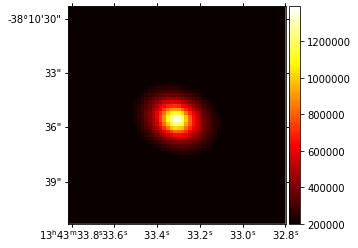

In [17]:
corte.info() #Display information/Apresenta informações
image = corte.sum(axis=0) #Make a image sum along the z axis/Faz uma imagem ao somar ao longo do eixo z
image.plot(use_wcs=True, cmap='hot',vmin=200000, colorbar='v') #Plot image/Plota a imagem
plt.savefig('/home/carlos/Desktop/ESO325 MUSE-ColletBinning/Figs/MUSE ESO325.png', fmt='png', dpi=1200) #Save the Image/Sava a image
corte.write('/home/carlos/Desktop/ESO325 MUSE-ColletBinning/Data/Cut.fits')#Save the fits file/Save o arquivo .fits